In [1]:
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
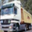

In [4]:
X_train[1]

In [5]:
X_train[0].max()

255

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
X_train[0].max()

1.0

In [8]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

#Modeling

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, input_shape=(32,32,3),kernel_size=5,strides=1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(16,kernel_size=5,strides=1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Dense(84))
model.add(tf.keras.layers.Dense(10, activation="softmax"))



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
model.fit(X_train, y_train_enc, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 11s 6ms/step - loss: 1.5964 - accuracy: 0.4340 - val_loss: 1.4188 - val_accuracy: 0.4966
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3613 - accuracy: 0.5225 - val_loss: 1.3270 - val_accuracy: 0.5386
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2932 - accuracy: 0.5481 - val_loss: 1.3393 - val_accuracy: 0.5292
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2533 - accuracy: 0.5629 - val_loss: 1.2928 - val_accuracy: 0.5462
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2244 - accuracy: 0.5759 - val_loss: 1.2573 - val_accuracy: 0.5621
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2041 - accuracy: 0.5840 - val_loss: 1.2475 - val_accuracy: 0.5642
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1830 - accuracy: 0.5911 - val_loss: 1.2786 - val_accuracy

In [14]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_pred = pred.argmax(axis=1)

In [16]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [17]:
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy :  0.5931
--------------------------------------------------
F1 :  [0.61191626 0.71984244 0.4281559  0.43826257 0.54372814 0.47678665
 0.67191115 0.63718334 0.69734151 0.67071935]
--------------------------------------------------
Reacll :  [0.57  0.731 0.368 0.449 0.544 0.457 0.726 0.742 0.682 0.662]
--------------------------------------------------
Precision :  [0.66048667 0.70902037 0.51182197 0.42802669 0.54345654 0.49836423
 0.625323   0.55831452 0.71338912 0.67967146]
--------------------------------------------------
Confusion Matrix....
 [[570  47  65  39  29  14  22  28 127  59]
 [ 22 731  12  16   6  13  31  23  33 113]
 [ 76  10 368  80 133  94 121  90  17  11]
 [ 25  17  74 449  72 161  86  77  18  21]
 [ 26   7  53  81 544  33  75 156  17   8]
 [ 15   6  59 206  64 457  48 124  10  11]
 [  2   8  24  81  73  34 726  34   7  11]
 [  9   3  33  39  54  80  12 742   6  22]
 [ 95  72  19  27  13  11  21   4 682  56]
 [ 23 130  12  31  13  20  19  51  39 662]]
-------

NameError: name 'plt' is not defined

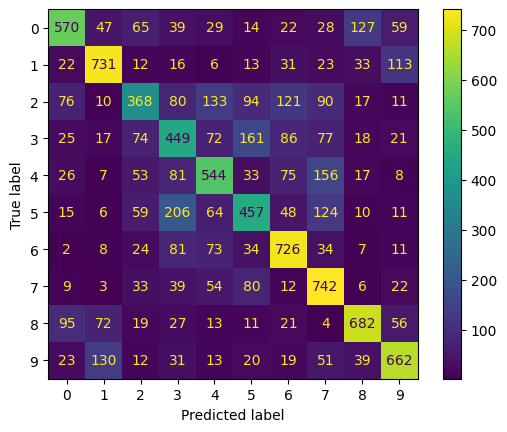

In [18]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average=None)

# Recall
recall = recall_score(y_test, y_pred, average=None)

# F1 Score
f1_sco = f1_score(y_test, y_pred, average=None)

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Report
report = classification_report(y_test, y_pred)

print('Accuracy : ', accuracy)
print("-"*50)
print('F1 : ', f1_sco)
print("-"*50)
print('Reacll : ', recall)
print("-"*50)
print('Precision : ', precision)
print("-"*50)
print('Confusion Matrix....\n', confusion_mat)
print("-"*50)
print('Classification Report....\n', report)
print("-"*50)
print('Plotting Confusion Matrix...\n')
disp = ConfusionMatrixDisplay(confusion_mat, display_labels=None)
disp.plot()
plt.show()